In [167]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers.core import Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools

## Question 1

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
x1 = []
x2 = []
y = []

with open('data//D2z.txt') as file:
    for line in file:
        var = line.split(' ')
        x1.append(float(var[0]))
        x2.append(float(var[1]))
        y.append(int(var[2][0]))
        #print(var)
        
x_train = np.vstack((np.array(x1), np.array(x2))).T
y_train = np.array(y)

In [172]:
test_x1 = [i/10 for i in range(-20,21,1)]
test_x2 = [i/10 for i in range(-20,21,1)]

cartesian_list = []
for element in itertools.product(*[test_x1, test_x2]):
    cartesian_list.append(list(element))

In [179]:
neighbors_1 = KNeighborsClassifier(n_neighbors=1)
neighbors_1.fit(x_train, y_train)

y_pred = neighbors_1.predict(cartesian_list)

In [195]:
train = np.vstack((np.array(x1), np.array(x2), np.array(y))).T
train_df = pd.DataFrame(train)

test_df = pd.DataFrame(cartesian_list)
test_df['2'] = y_pred 

In [194]:
test_df.head()

,0,1,2
0,-2.0,-2.0,1
1,-2.0,-1.9,1
2,-2.0,-1.8,1
3,-2.0,-1.7,1
4,-2.0,-1.6,1


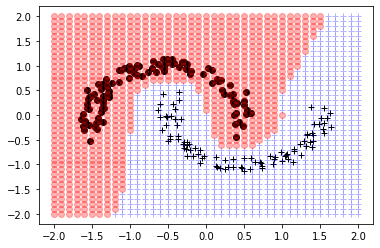

In [341]:
fig, ax = plt.subplots()

for index, row in train_df.iterrows():
    if int(row[2]) == 0:
        ax.plot(row[0], row[1], 'k+')
    else:
        ax.plot(row[0], row[1], 'ko')
        
for index, row in test_df.iterrows():
    if int(row['2']) == 0:
        ax.plot(row[0], row[1], 'b+', alpha=0.3)
    else:
        ax.plot(row[0], row[1], 'ro', alpha=0.3)
        
plt.savefig('Programming_1.png')
plt.show()

## Question 2

In [205]:
email_df = pd.read_csv('data//emails.csv')

y = email_df.pop('Prediction')
email_df.pop('Email No.')
email_df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [175]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=5)

neighbors_2 = KNeighborsClassifier(n_neighbors=1)
results = cross_validate(estimator=neighbors_2, X=email_df,y=y,cv=kfold,scoring=scoring)

In [176]:
results

{'fit_time': array([0.06250834, 0.04726481, 0.04687881, 0.04726219, 0.04687786]),
 'score_time': array([0.20396447, 0.18831134, 0.20397472, 0.18833852, 0.1880281 ]),
 'test_accuracy': array([0.825, 0.853, 0.862, 0.851, 0.775]),
 'test_precision': array([0.65449438, 0.68571429, 0.72121212, 0.71641791, 0.60574413]),
 'test_recall': array([0.81754386, 0.86642599, 0.83802817, 0.81632653, 0.75816993]),
 'test_f1_score': array([0.72698908, 0.76555024, 0.7752443 , 0.76311606, 0.67343977])}

## Question 3

In [295]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import copy

In [326]:
def sigmoid(z):    
    output = 1 / (1 + np.exp(-z))
    return output

def train(x, y, alpha, epochs, params):

    size = x.shape[0]
    weight = params["w"] 
    bias = params["b"]
    for i in range(epochs): 
        sigma = sigmoid(np.dot(x, weight) + bias)
        loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
        dW = 1/size * np.dot(x.T, (sigma - y))
        db = 1/size * np.sum(sigma - y)
        weight -= alpha * dW
        bias -= alpha * db 
    
    params["w"] = weight
    params["b"] = bias
    return params

def predict(x, params):
    probs = np.dot(x, params['w'])
    return [1 if p > 0.5 else 0 for p in sigmoid(probs)]

In [310]:
for i in range(len(y)):
    y[i] = float(y[i])

In [333]:
folds = 5
prev_max = 0
lr = 0.01
epochs = 500
accuracies = []
precisions = []
recalls = []

for i in range(1, folds+1):
    max_i = i*1000
    x_train = pd.concat([email_df[0:prev_max], email_df[max_i:]])
    x_test = email_df[prev_max:max_i]
    y_train = pd.concat([y[0:prev_max],y[max_i:]])
    y_test = y[prev_max:max_i]
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    init_params = {} 
    init_params["w"] = np.zeros(x_train.shape[1])
    init_params["b"] = 0

    end_params = train(x_train, y_train, lr, epochs, init_params)
    y_pred = predict(x_test, end_params)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    
    prev_max = max_i

C:\Users\ryank\AppData\Local\Temp/ipykernel_8064/1820863800.py:2: RuntimeWarning: overflow encountered in exp
  output = 1 / (1 + np.exp(-z))
C:\Users\ryank\AppData\Local\Temp/ipykernel_8064/1820863800.py:12: RuntimeWarning: divide by zero encountered in log
  loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
C:\Users\ryank\AppData\Local\Temp/ipykernel_8064/1820863800.py:12: RuntimeWarning: invalid value encountered in multiply
  loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
C:\Users\ryank\AppData\Local\Temp/ipykernel_8064/1820863800.py:2: RuntimeWarning: overflow encountered in exp
  output = 1 / (1 + np.exp(-z))
C:\Users\ryank\AppData\Local\Temp/ipykernel_8064/1820863800.py:12: RuntimeWarning: divide by zero encountered in log
  loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
C:\Users\ryank\AppData\Local\Temp/ipykernel_8064/1820863800.py:12: RuntimeWarning: invalid value encountered in multiply
  loss = -1/size * np

In [334]:
accuracies, precisions, recalls

([0.723, 0.783, 0.864, 0.747, 0.821],
 [0.5076628352490421,
  0.875,
  0.8854166666666666,
  0.9767441860465116,
  0.6798866855524079],
 [0.9298245614035088,
  0.2527075812274368,
  0.5985915492957746,
  0.14285714285714285,
  0.7843137254901961])

## Question 4

In [206]:
k = []
mean_scores = []
for i in range(1, 10, 2):
    if(i == 9):
        i = 10
    neigh = KNeighborsClassifier(n_neighbors=i)
    cv = KFold(n_splits=5, shuffle=False)
    scores = cross_val_score(neigh, email_df, y, scoring='accuracy', cv=cv)
    k.append(i)
    mean_scores.append(np.mean(scores))

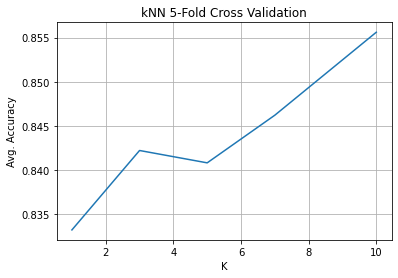

In [338]:
plt.grid(visible=True)
plt.plot(k, mean_scores)
plt.xlabel('K')
plt.ylabel('Avg. Accuracy')
plt.title('kNN 5-Fold Cross Validation')
plt.savefig('Programming_4.png')

## Question 5

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train= email_df[:4000]
x_test = email_df[4000:5000]
y_train = y[:4000]
y_test = y[4000:5000]

C:\Users\ryank\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ryank\AppData\Local\Temp/ipykernel_8064/2516816837.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_l, tpr_l, 'b', label = 'Logisitc AUC = %0.2f' % roc_auc_l, color='orange')


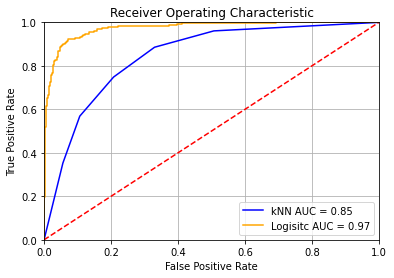

In [336]:
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(x_train, y_train)

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

y_pred_k = np.array(neighbors.predict_proba(x_test))[:,1]
y_pred_l = np.array(logistic.predict_proba(x_test))[:,1]

fpr_k, tpr_k, threshold_k = metrics.roc_curve(y_test, y_pred_k)
roc_auc_k = metrics.auc(fpr_k, tpr_k)

fpr_l, tpr_l, threshold_l = metrics.roc_curve(y_test, y_pred_l)
roc_auc_l = metrics.auc(fpr_l, tpr_l)

plt.grid(visible=True)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_k, tpr_k, 'b', label = 'kNN AUC = %0.2f' % roc_auc_k)
plt.plot(fpr_l, tpr_l, 'b', label = 'Logisitc AUC = %0.2f' % roc_auc_l, color='orange')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Programming_5.png')
plt.show()